MOVIE GENRE CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
# Load train and test datasets
train_data = 'C:\\Users\\loges\\Downloads\\archive\\Genre Classification Dataset\\train_data.txt'
train_data = pd.read_csv(train_data,sep=':::', names=['Title', 'Genre', 'Description'], engine='python')


In [4]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
test_data = 'C:\\Users\\loges\\Downloads\\archive\\Genre Classification Dataset\\test_data.txt'
test_data = pd.read_csv(test_data, sep=':::', names=['Id', 'Title', 'Description'], engine='python')


In [6]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


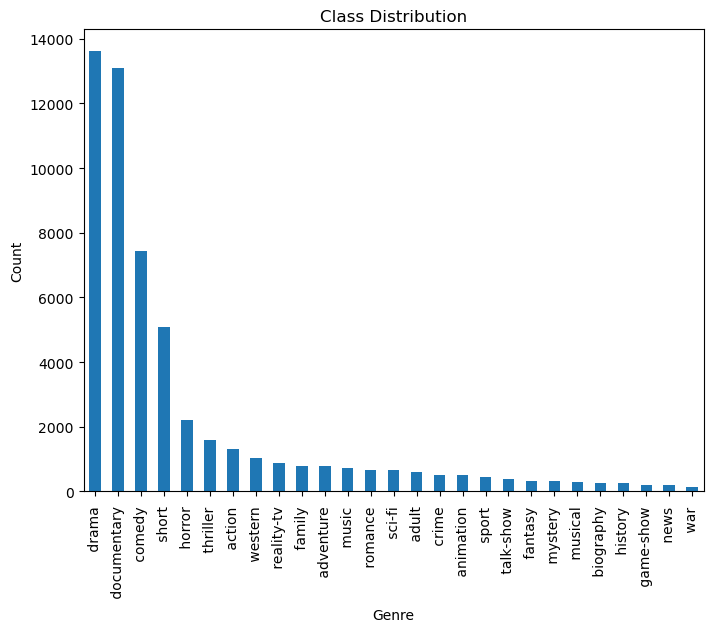

In [7]:

# Plot class distribution
plt.figure(figsize=(8, 6))
train_data['Genre'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [8]:
# Split train dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['Description'], train_data['Genre'], test_size=0.2, random_state=42)


In [9]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [10]:
# Train classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

In [11]:
for name, classifier in classifiers.items():
    print(f"\nTraining {name} Classifier...")
    classifier.fit(X_train_tfidf, y_train)

    # Predictions
    y_pred = classifier.predict(X_val_tfidf)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Classification Report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_val, y_pred))
    


Training Naive Bayes Classifier...
Naive Bayes Accuracy: 0.5111

Naive Bayes Classification Report:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.58      0.05      0.10       263
       adult        0.67      0.02      0.03       112
   adventure        0.38      0.02      0.04       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.89      0.69      2659
       drama        0.44      0.83      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.76      0.26      0.39       431
       music        0.92      0.08      0.15       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.54      0.28      0.37       263
       adult        0.83      0.21      0.34       112
   adventure        0.39      0.12      0.19       139
   animation        0.69      0.09      0.15       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.20      0.01      0.02       107
 documentary        0.67      0.86      0.75      2659
       drama        0.55      0.79      0.65      2697
      family        0.40      0.08      0.13       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.42      0.60        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.57      0.61       431
       music        0.64      0.49      0.55       144
     musical        0.50      0.02      0.04        50
     mystery        1.00      0.02      0.04        56
        n

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


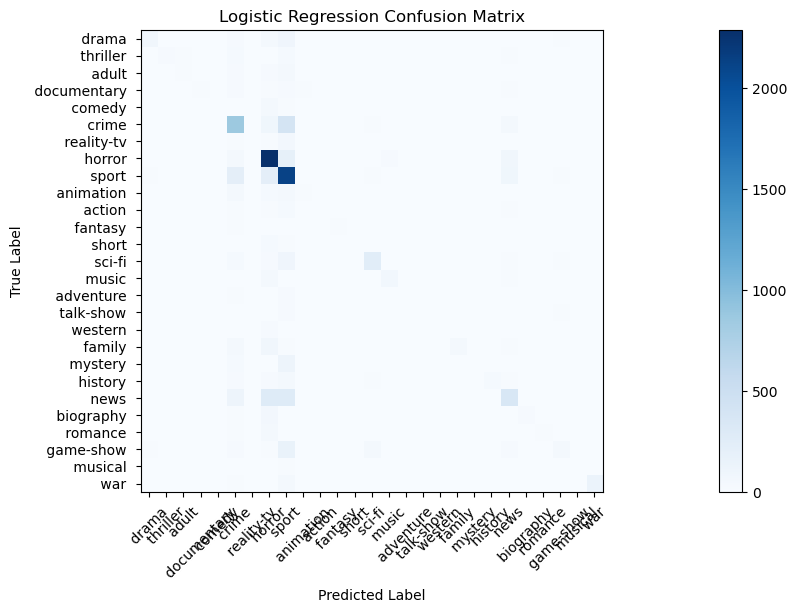

In [20]:
  # Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(30,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'{name} Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(train_data['Genre'].unique())), train_data['Genre'].unique(),rotation = 45)
plt.yticks(np.arange(len(train_data['Genre'].unique())), train_data['Genre'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
# Predictions on test dataset
X_test_tfidf = tfidf_vectorizer.transform(test_data['Description'])
test_predictions = classifiers["Logistic Regression"].predict(X_test_tfidf)

# Add predictions to test dataset
test_data['predicted_genre'] = test_predictions

# Save predictions to a CSV file
test_data.to_csv("test_predictions.csv", index=False)

In [22]:
test_data.head()

,Id,Title,Description,predicted_genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama


                        ----------------------------------------------------------------------------------------------